In [1]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
import datetime

In [8]:
def create_single_plot(day, route, discount, tariffClass, path, age):

    

    headers = ['price', 'ticket type', 'age', 'discount', 'date', 'departure', 'destination', 'duration', 'start time', 'arrival time', 'changes', 'tariffClass']
    df = pd.read_csv(path, skiprows=[0], header=None, names=headers)

    df = df.drop_duplicates()

    df.drop(df[df['ticket type'] == 'Normalpreis'].index, inplace = True)

    df['price'] = df['price'].str.replace(',','.')
    df['price'] = df['price'].astype(float)

    df['date'] = df['date'].str.slice(start=4)


    df['datetime dep'] = df['start time'] +'-'+ df['date']
    df['datetime arr'] = df['arrival time'] +'-'+ df['date']
    df['datetime dep'] = pd.to_datetime(df['datetime dep'], format="%H:%M-%d.%m.%Y")
    df['datetime arr'] = pd.to_datetime(df['datetime arr'], format="%H:%M-%d.%m.%Y")

    df['sub [min]'] = (df['datetime arr'] - df['datetime dep']).astype('timedelta64[m]')

    df = df.drop('date', axis=1)
    df = df.drop('duration', axis=1)
    df = df.drop('start time', axis=1)
    df = df.drop('arrival time', axis=1)

    df['departure'] = df['departure'].apply(lambda x: 'Berlin' if x == 'Berlin+Hbf' else x)
    df['destination'] = df['destination'].apply(lambda x: 'Biberach' if x == 'Biberach%28Ri%C3%9F%29' else x)
    df['destination'] = df['destination'].apply(lambda x: 'Memmingen' if x == 'Bahnhof+ZOB%252C+Memmingen' else x)

    df['time'] = pd.to_datetime(df['datetime dep']).dt.strftime('%H:%M')

    plt = sb.lineplot(data=df, x='time', y='price', hue='ticket type')
    plt.set_xticklabels(plt.get_xticklabels(),rotation = 40)
    plt.tick_params(labelsize=7)
    title = f'{route} {day} | age: {age}, discount: {discount}, class: {tariffClass}'
    plt.set(title=title)
    sb.move_legend(plt, "upper left", bbox_to_anchor=(1, 1))

    fig = plt.get_figure()
    fig_path = f'plots/{route}/{day}_lineplot.png'
    fig.savefig(fig_path, dpi=200, bbox_inches='tight')

In [9]:
def create_multiple_plots():
    
    day = datetime.datetime.strptime('11_11_2022', '%d_%m_%Y').date()
    day_string = day.strftime('%d_%m_%Y')
    route='berlin-memmingen'
    age='E'
    discount='1'
    tariffClass='1'
    path=f'data/{route}/data_{age}_{discount}_{tariffClass}/{day_string}_{age}_{discount}.csv'

    for i in range(1, 12):
        plt.figure()
        create_single_plot(day_string, route, discount, tariffClass, path, age)
        day = datetime.datetime.now() + datetime.timedelta(i)
        day_string = day.strftime('%d_%m_%Y')
        path=f'data/{route}/data_{age}_{discount}_{tariffClass}/{day_string}_{age}_{discount}.csv'

/tmp/ipykernel_89876/197788937.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_xticklabels(plt.get_xticklabels(),rotation = 40)
/tmp/ipykernel_89876/197788937.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_xticklabels(plt.get_xticklabels(),rotation = 40)
/tmp/ipykernel_89876/197788937.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_xticklabels(plt.get_xticklabels(),rotation = 40)
/tmp/ipykernel_89876/197788937.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_xticklabels(plt.get_xticklabels(),rotation = 40)
/tmp/ipykernel_89876/197788937.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_xticklabels(plt.get_xticklabels(),rotation = 40)
/tmp/ipykernel_89876/197788937.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_xticklabels(plt.g

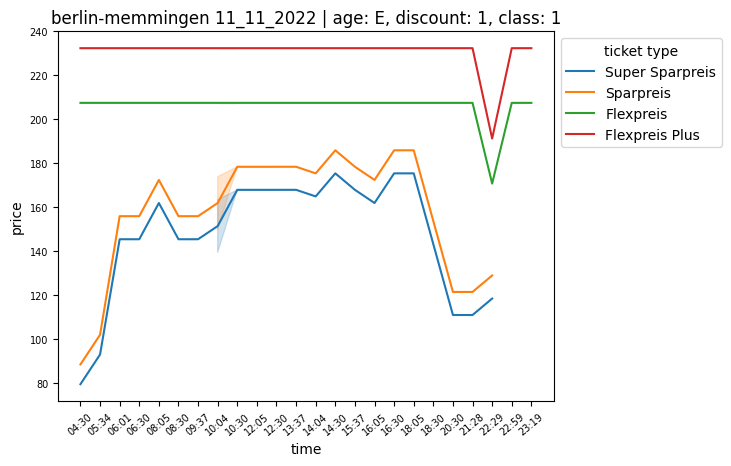

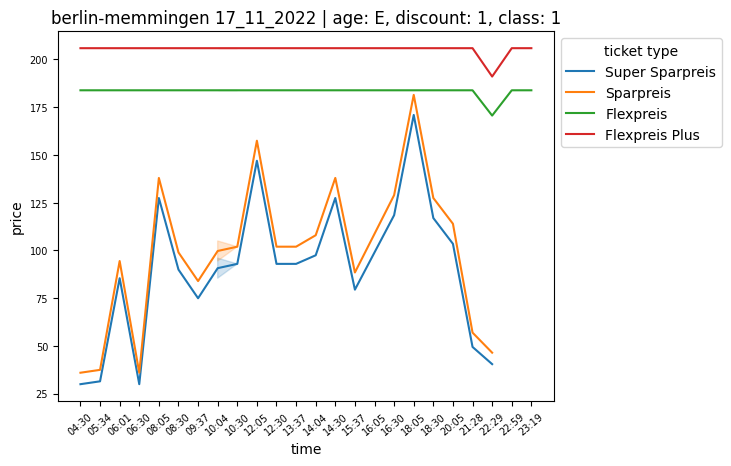

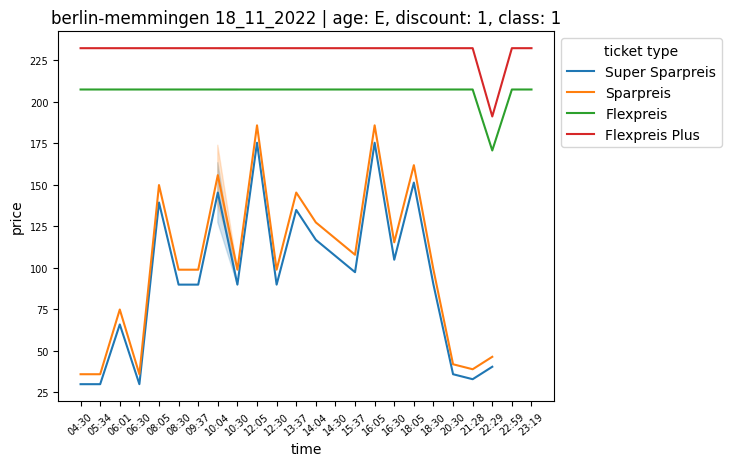

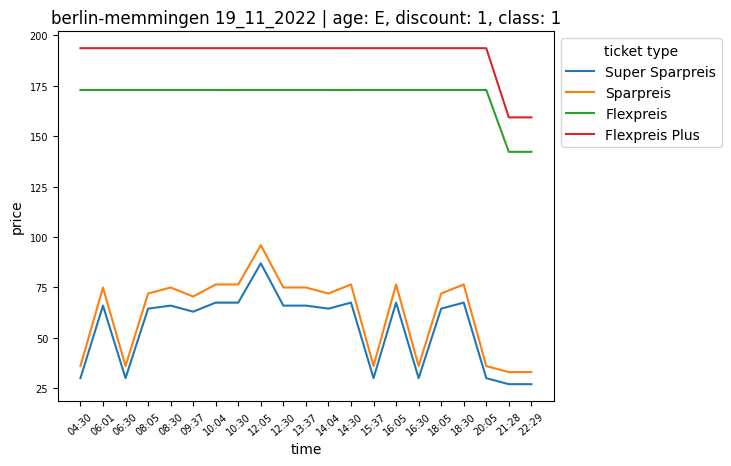

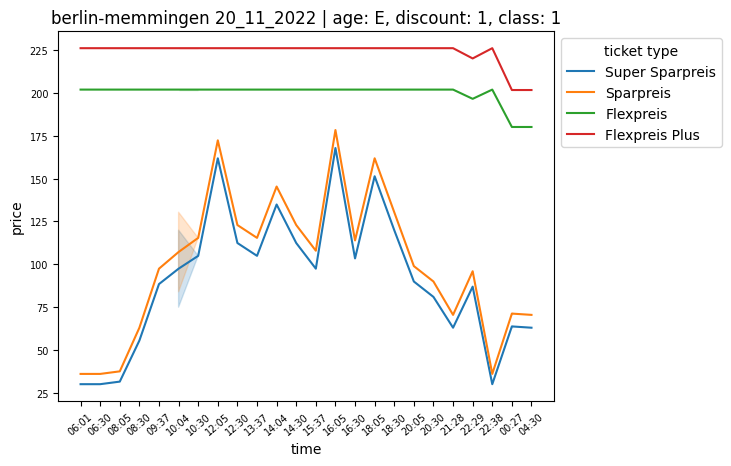

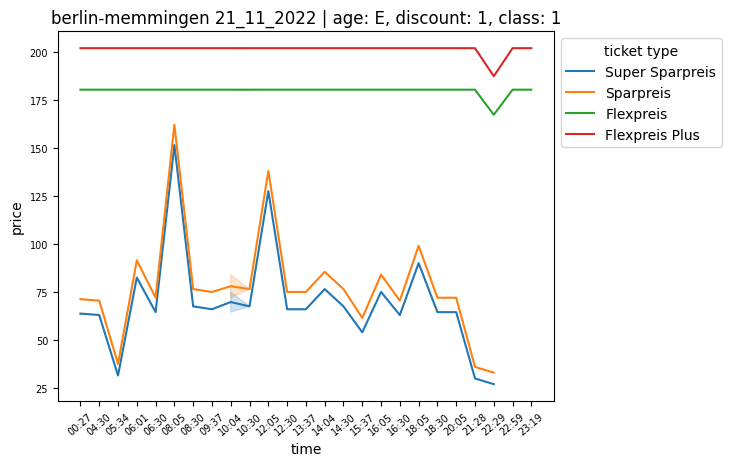

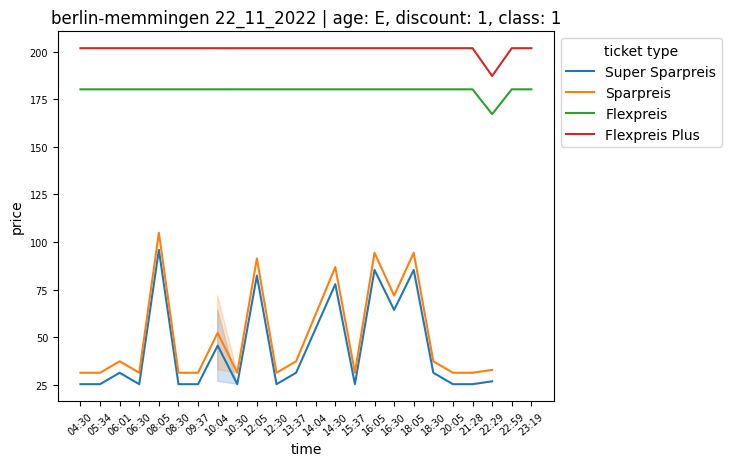

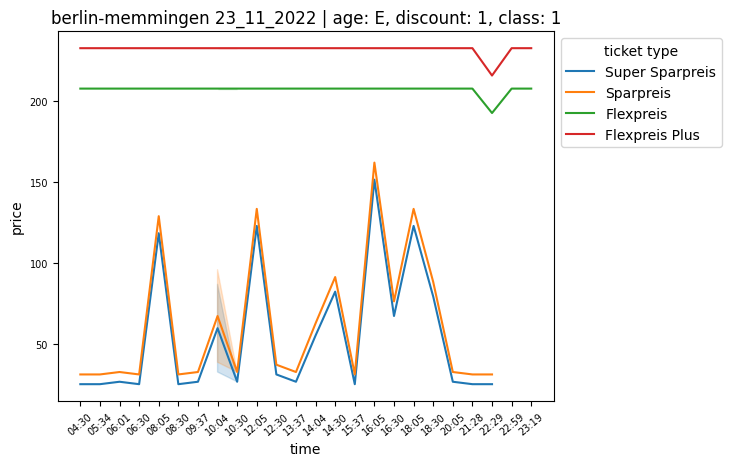

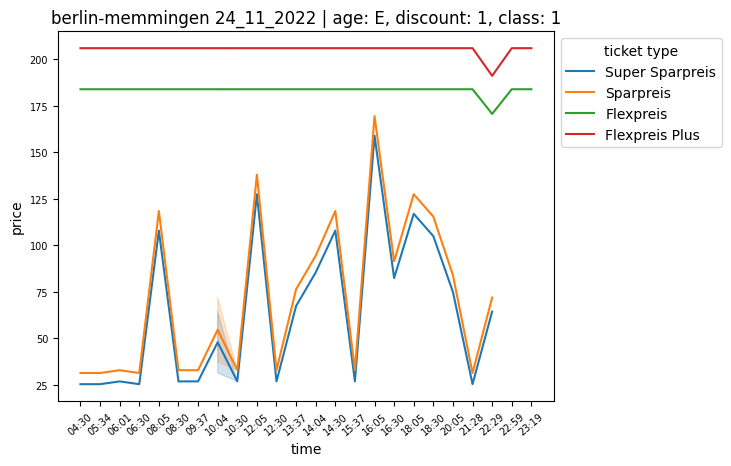

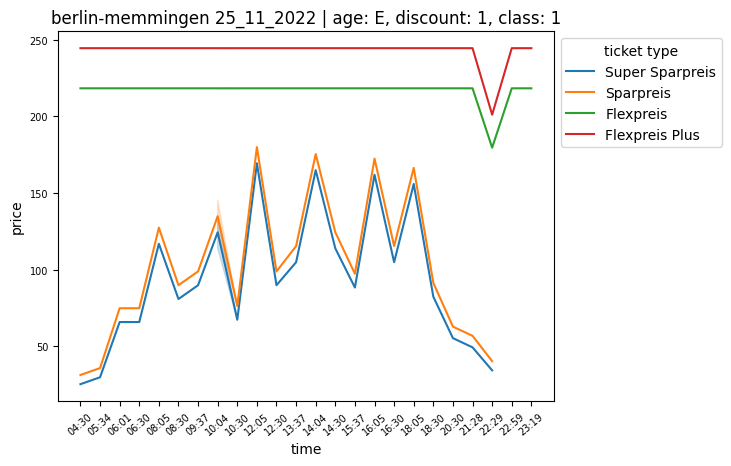

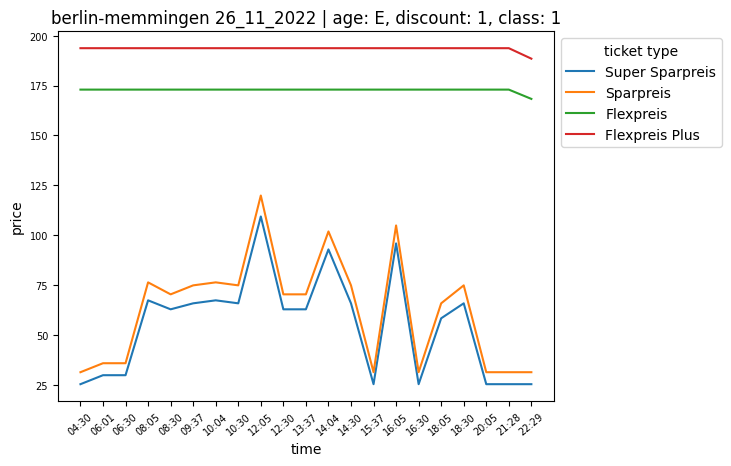

In [10]:
create_multiple_plots()